<a href="https://colab.research.google.com/github/murlokito/Miscellanea/blob/python_dev/Copy_of_101_Tensorflow_e_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TensorFlow

Um simples exemplo de apresentar uma mensagem.

Estamos a criar um simples grafo com uma constante.

In [0]:
import tensorflow as tf

'''O resultado do construtor representa a "Constant op" '''
hello = tf.constant("Hello, TensorFlow!")

'''Iniciar a sessão'''
sess = tf.Session()

'''Executar o grafo'''
print(sess.run(hello))

b'Hello, TensorFlow!'


### Extra


#### Shape?

In [0]:
t = tf.constant([[[1, 1, 1], [2, 2, 2]], [[3, 3, 3], [4, 4, 4]]])
tf.shape(t)  # [2, 2, 3]

<tf.Tensor 'Shape:0' shape=(3,) dtype=int32>

#### Porquê o b'  antes do texto
O resultado do grafo de sessão é do tipo 'bytestring' dai o resultado impresso ter o prefixo "b'"

In [0]:
# Extra:
# O resultado do grafo de sessão é do tipo 'bytestring' dai o resultado impresso
# tem o prefixo "b'"
print(sess.run(hello).decode())

Hello, TensorFlow!


#### Está o GPU a correr?

Não : '' 

Sim : ''/device:GPU:0'' 


In [0]:
tf.test.gpu_device_name()

'/device:GPU:0'

#### Ver Bibliotecas instaladas

In [0]:
!pip list

Package                  Version   
------------------------ ----------
absl-py                  0.6.1     
altair                   2.2.2     
astor                    0.7.1     
atomicwrites             1.2.1     
attrs                    18.2.0    
beautifulsoup4           4.6.3     
bleach                   3.0.2     
cachetools               3.0.0     
certifi                  2018.10.15
chardet                  3.0.4     
crcmod                   1.7       
cycler                   0.10.0    
cymem                    2.0.2     
cytoolz                  0.9.0.1   
decorator                4.3.0     
defusedxml               0.5.0     
dill                     0.2.8.2   
entrypoints              0.2.3     
future                   0.16.0    
gast                     0.2.0     
google-api-core          1.5.2     
google-api-python-client 1.6.7     
google-auth              1.4.2     
google-auth-httplib2     0.0.3     
google-auth-oauthlib     0.2.0     
google-cloud-bigquery    1.1

## Regressão Linear

Y = W * X + b

---

Y = W1X1 + W2X2 + ... + WnXn + b



In [0]:
# Parametros do Modelo

W = tf.Variable([3.0], name="weight")
b = tf.Variable([-2.0], name="bias")

In [0]:
# Inputs do Modelo

# Data de treino
X = tf.placeholder(tf.float32)
# y
Y = tf.placeholder(tf.float32)

In [0]:
# Definição do Modelo
predictions = M*X + b

In [0]:
# loss function. Aqui fazemos o quadrado do erro ( mse )
loss = tf.reduce_sum(tf.square(predictions-Y))

In [0]:
# Operação de Treino (op trainning)
train = tf.train.GradientDescentOptimizer(0.001).minimize(loss)

In [0]:
# train data e Sessão

x = [1.1,2.0,3.5,4.8]
y = [2.0,3.4,4.2,5.1]
sess.run(tf.global_variables_initializer())
for train_step in range(2000):
    sess.run(train,{X:x,Y:y})

In [0]:
# Resultado
weight, bias, loss = sess.run([W, b, loss], {X:x, Y:y})

print("W: %s b: %s loss: %s"%(weight,bias,loss))

W: [3.] b: [1.2378168] loss: 0.2880003


# Keras



É uma API de alto nível para construir e treinar modelos 'deep learning'. É usado para criar de forma rápida modelos avançados para pesquisa e producão, focado em três pontos:

* Fácil de usar
> Keras tem uma simples, consistente interface optimizada para os casos mais comuns. Fornece uma resposta limpa dos erros do utilizador

* Modular
> Os modelos de Keras são criados por blocos configuraveis com poucas restrições
* Fácil de extender
> Criar blocos personalizados basta usar as várias 'layers', 'loss functions' que existem para criar modelos de estado de arte 

[[Keras Website]](https://www.tensorflow.org/guide/keras)

### Keras vs tf.Keras

Keras em 2017 tornou-se uma componente oficial no Tensorflow indicado como 'tf.keras'. Estando todas as mesmas funcionlidades integradas, não sendo necessário incluir umas outra linguagem. [anuncio](https://www.fast.ai/2017/01/03/keras/)


Keras tem o conceito de "backend", onde o backend poder ser: Tensorflow, CNTK ou Theano. Uma linguagem 3 frameworks


[tf.keras](https://www.tensorflow.org/api_docs/python/tf/keras)  consegue correr qualquer código compativel mas tenham em mente que:

* Que a versão de ```tf.keras``` mais recente de Tensorflow pode não ser exactamente a mesma que a do PyPi, verificar sempre a compatibilidade por ```tf.keras.version```

* Quando se for a gravar os pesos de um modelo, tf.keras vai por omissão para ```checkpoint format```. Passar o formato 'h5' com ```save_format='h5'``` para usar HDF5

In [0]:
import tensorflow as tf
from tensorflow.keras import layers

print(tf.VERSION)
print(tf.keras.__version__)

1.12.0
2.1.6-tf


## Um simples modelo

### Tensorflow

In [0]:
x = tf.placeholder(tf.float32, [1, 64])
model = tf.layers.dense(x, 64, tf.nn.relu)
model = tf.layers.dense(model, 64, tf.nn.relu)
model = tf.layers.dense(model, 10, tf.nn.softmax)

model

<tf.Tensor 'dense_20/Softmax:0' shape=(1, 10) dtype=float32>

### Keras

In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape= (1,64) ),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 1, 64)             4160      
_________________________________________________________________
dense_7 (Dense)              (None, 1, 64)             4160      
_________________________________________________________________
dense_8 (Dense)              (None, 1, 10)             650       
Total params: 8,970
Trainable params: 8,970
Non-trainable params: 0
_________________________________________________________________


### Regressão Linear com Keras

1 - Importação das bibliotecas

In [0]:
import tensorflow as tf
import pandas as pd
import numpy as np
import random

random.seed(42)

2 - Variáveis 

In [0]:
# Média, desvio padrão, e dimensão do dataset
mu, sigma, size = 0, 4, 100

# Inclinação/slope (m) e onde corta com o eixo y-intercept (b)
m, b = 2, 10

3 - Geração dados sintéticos

In [0]:
x = np.random.uniform(0,10, size)
df = pd.DataFrame({'x':x})

df['y_perfect'] = df['x'].apply(lambda x: m*x+b)

df['noise'] = np.random.normal(mu, sigma, size=(size,))
df['y'] = df['y_perfect'] + df['noise']

4 - Criar o modelo

In [0]:
model = tf.keras.Sequential([
        tf.keras.layers.Dense(1, activation='linear', input_shape=(1,))
    ])

5 - Compilar o Modelo

In [0]:
model.compile(loss='mse', optimizer='adam')

6 - Treinar o modelo

In [0]:
history = model.fit(x=df['x'], y=df['y'], validation_split=0.2, batch_size=1, epochs=100)

Train on 80 samples, validate on 20 samples
Epoch 1/100
80/80 [==============================] - 1s 16ms/step - loss: 507.0104 - val_loss: 493.2637
Epoch 2/100
80/80 [==============================] - 0s 3ms/step - loss: 489.8557 - val_loss: 475.9357
Epoch 3/100
80/80 [==============================] - 0s 3ms/step - loss: 472.9547 - val_loss: 457.7176
Epoch 4/100
80/80 [==============================] - 0s 3ms/step - loss: 456.5244 - val_loss: 440.6481
Epoch 5/100
80/80 [==============================] - 0s 3ms/step - loss: 440.4832 - val_loss: 424.7174
Epoch 6/100
80/80 [==============================] - 0s 3ms/step - loss: 424.9344 - val_loss: 408.3326
Epoch 7/100
80/80 [==============================] - 0s 3ms/step - loss: 409.7525 - val_loss: 392.5779
Epoch 8/100
80/80 [==============================] - 0s 4ms/step - loss: 395.0056 - val_loss: 377.4533
Epoch 9/100
80/80 [==============================] - 0s 4ms/step - loss: 380.5768 - val_loss: 363.1471
Epoch 10/100
80/80 [========

7 -  Resultado dos pesos

In [0]:
predicted_m = model.get_weights()[0][0][0]
predicted_b = model.get_weights()[1][0]

print("m={0:.2f} b={1:.2f}".format(predicted_m, predicted_b))

m=2.82 b=4.70


8 - Previsão

In [0]:
df['y_predicted'] = df['x'].apply(lambda x: predicted_m*x + predicted_b)


9 - Visualização dos Resultados

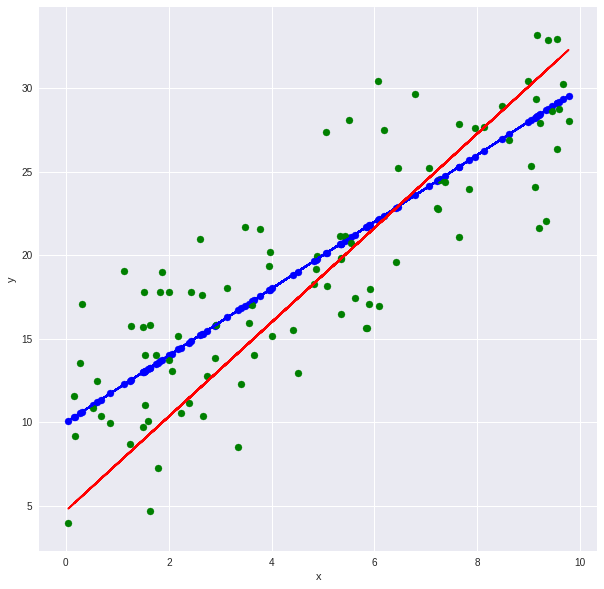

In [0]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))

plt.plot(df['x'], df['y_perfect'], c='blue')
plt.scatter(df['x'], df['y_perfect'], c='blue')
plt.plot(df['x'], df['y_predicted'], c='red')
plt.scatter(df['x'], df['y'], c='green')
plt.ylabel('y')
plt.xlabel('x')
plt.show()